In [1]:
import tensorflow as tf

def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    print(t.eval())
    sess.close()
    
c2, c3 = tf.constant([1.2,5.6]), tf.constant([-4,-1,7])
v2, v3 = tf.Variable([2.3,4.5]), tf.Variable([-2,3,5])
showvalue(tf.add_n([c2,v2]))
showvalue(tf.add_n([c3,v3,v3]))
showvalue(tf.sqrt(tf.cast(v3, tf.float64 )))

[ 3.5 10.1]
[-8  5 17]
[       nan 1.73205081 2.23606798]


In [5]:
c4 = tf.constant([[1,3,5],[0,2,4]])
v4 = tf.Variable([[1,2],[3,7],[8,9]])
showvalue(c4)
print('--------------------')
showvalue(tf.matmul(c4,v4))
print('--------------------')
showvalue(tf.matmul(v4,c4))

[[1 3 5]
 [0 2 4]]
--------------------
[[50 68]
 [38 50]]
--------------------
[[ 1  7 13]
 [ 3 23 43]
 [ 8 42 76]]


#### 차원 축소, 차원 확대
- 차원 축소 : 매트릭스 행x열 감소 : 특징추출
- 차원 확대 : 퍼셉트론 기법( 표면 상의 점을 하나의 선으로 나눌 수 없을 때, 다른 공간으로 분리)

In [11]:
a = tf.eye(4) #단위행렬, eigenvalue
# 행렬 x 역행렬 = 단위행렬
r = tf.range(1,5,1)
d = tf.diag(r)

showvalue(a)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [12]:
showvalue(r)

[1 2 3 4]


In [13]:
showvalue(d)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [15]:
# 정상 세션 형태
a = tf.Variable(tf.ones((2,2)))
a

sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 변수 초기화
print(a.eval(session=sess))
sess.run(a.assign(tf.zeros((2,2))))
sess.run(a)

[[1. 1.]
 [1. 1.]]


array([[0., 0.],
       [0., 0.]], dtype=float32)

[[0.95227146 0.67740774 0.79531825 ... 0.29214978 0.21008277 0.42609882]
 [0.93323886 0.4174106  0.7148676  ... 0.9705007  0.7974247  0.03802633]
 [0.91064906 0.32840455 0.39045668 ... 0.56509244 0.4010228  0.5612292 ]
 ...
 [0.9667587  0.7631197  0.498304   ... 0.7472609  0.9670266  0.16477144]
 [0.37495553 0.54664207 0.55696404 ... 0.4295944  0.27721107 0.67970383]
 [0.37385798 0.18794906 0.61325896 ... 0.31705284 0.50477433 0.29372215]]


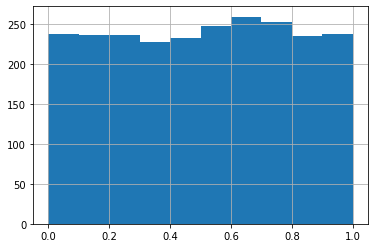

In [27]:
import tensorflow as tf
#matplotlib inline

def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

my_distribution = tf.random_uniform((60,40), seed=42) # 같은 값을 포기 위해  seed 값 설정
uniform = run_variable(my_distribution)
print(uniform)

from matplotlib import pyplot as plt

plt.grid()
# 1 차원 데이터 생성
plt.hist(uniform.flatten())
plt.show()

In [28]:
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
b = tf.constant([7,8,9,10,11,12], shape=[3,2])
c = tf.matmul(a,b)
sess = tf.Session()
print(sess.run(a))

[[1 2 3]
 [4 5 6]]


In [31]:
print(sess.run(b))

[[ 7  8]
 [ 9 10]
 [11 12]]


In [33]:
print(sess.run(c))

[[ 58  64]
 [139 154]]


In [39]:
x = a 
y = tf.transpose(x)
print(sess.run(x))

[[1 2 3]
 [4 5 6]]


In [41]:
c = tf.matmul(x, y)
print(sess.run(c))

[[14 32]
 [32 77]]


In [44]:
import numpy as np

a = tf.constant(np.arange(1,25,dtype=np.int32),
               shape=[2,2,2,3])
b = tf.constant(np.arange(1,25, dtype=np.int32),
              shape=[2,2,3,2])
c = tf.matmul(a,b)
print(sess.run(c))

[[[[  22   28]
   [  49   64]]

  [[ 220  244]
   [ 301  334]]]


 [[[ 634  676]
   [ 769  820]]

  [[1264 1324]
   [1453 1522]]]]


In [47]:
a_1 = tf.range(1,25,1, dtype=tf.float32)
a = tf.reshape(b, (2,2,2,3))
b_1 = tf.range(1,25,1, dtype=tf.float32)
b = tf.reshape(b, (2,2,3,2))
c = tf.matmul(a,b)
print(sess.run(c))

[[[[  22   28]
   [  49   64]]

  [[ 220  244]
   [ 301  334]]]


 [[[ 634  676]
   [ 769  820]]

  [[1264 1324]
   [1453 1522]]]]


In [51]:
x = tf.constant([[[1,2,3],
                [4,5,6]],
               [[7,8,9],
               [10,11,12]]])

In [54]:
print(sess.run(tf.shape(x)))

[2 2 3]


In [58]:
print(sess.run(x))

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [55]:
# 0: 면, 1: 행, 2:열
y = tf.transpose(x, perm=[0,2,1])

In [56]:
print(sess.run(y))

[[[ 1  4]
  [ 2  5]
  [ 3  6]]

 [[ 7 10]
  [ 8 11]
  [ 9 12]]]


In [57]:
print(sess.run(tf.matmul(x,y)))

[[[ 14  32]
  [ 32  77]]

 [[194 266]
  [266 365]]]


In [63]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]
print(sess.run(tf.reshape(tensor, [2,-1])))
print('---------------------------')
t = tf.reshape(tensor, [-1,6])
print(sess.run(tf.reshape(tensor, [2,-1,3])))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
---------------------------
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


#### tensor_flow  자료형
- constant
- variables = weight
- placeholder = 실행 시 전달  feeding
- variable = 주소값 
- name = 이름을 줌으로써, 모델 저장 시 로딩했을 때, 데이터를 불러오기 위한 개념

In [67]:
# placeholder
# 32 비트 = 4바이트, [] 괄호는 벡터
a = tf.placeholder(tf.int32, shape=[2], name='my_input') #tensorboard, 모델 저장 시 원하는 데이터 불러오기 위한 이름 
b = tf.reduce_prod(a, name='prod_b')
c = tf.reduce_sum(a, name='sum_c')
d = tf.add(b,c,name='add_d')

In [65]:
sess = tf.Session()
# feeding 할 때는, key 데이터 형태로 전달한다 
input_dict = {a:np.array([5,3], dtype=np.int32)}
# d를 실행할 때, feed_dict = input_dict 값으로 데이터 넣어줘라
sess.run(d, feed_dict=input_dict)

23

In [68]:
# broadcasting
a = tf.constant([1,2,3], name='a')
# a+b 충족을 위해 ([4,4,4]) 자동 맞춤
b = tf.constant(4, name='b')
add_op = a+b

with tf.Session() as session:
    print(session.run(add_op))

[5 6 7]


In [70]:
# broadcasting
a = tf.constant([[1,2,3],[4,5,6]], name='a')
# a+b 충족을 위해 ([4,4,4]) 자동 맞춤
b = tf.constant([[100],[101]], name='b')
add_op = a+b


[[101 102 103]
 [105 106 107]]


In [ ]:
# placeholder
# 32 비트 = 4바이트, [] 괄호는 벡터
a = tf.placeholder(tf.int32, shape=[2], name='my_input') #tensorboard, 모델 저장 시 원하는 데이터 불러오기 위한 이름 
b = tf.reduce_prod(a, name='prod_b')
c = tf.reduce_sum(a, name='sum_c')
d = tf.add(b,c,name='add_d')

In [ ]:
sess = tf.Session()
# feeding 할 때는, key 데이터 형태로 전달한다 
input_dict = {a:np.array([5,3], dtype=np.int32)}
# d를 실행할 때, feed_dict = input_dict 값으로 데이터 넣어줘라
sess.run(d, feed_dict=input_dict)

In [78]:
# 문제 호출방법: add, feed_dict = {a:2, b:3}

import tensorflow as tf

a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a,b)

with tf.Session() as sess:
    print(sess.run(add, feed_dict={a:2, b:3}))

5


In [82]:
import tensorflow as tf

a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a,b)
mul = tf.multiply(a,b)
total = tf.multiply(add, mul)
with tf.Session() as sess:
    print(sess.run(add, feed_dict={a:2, b:3}))
    print(sess.run(mul, feed_dict={a:2, b:3}))
    print(sess.run(total, feed_dict={a:2, b:3}))

5
6
30


In [86]:
# 1~10까지 더하는 프로그램
x = tf.Variable(0, name='x')
hap = tf.Variable(0, name='hap')

model = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(model)
    for i in range(10):
        x = x +i
        hap = hap+x
        print(sess.run(x))
    print('1~10부터 100까지 합은 {}'.format(sess.run(hap)))

0
1
3
6
10
15
21
28
36
45
1~10부터 100까지 합은 165


In [ ]:
# 방정식 생성 프로그램
res = []
for i in range(10):
    for j in range(10):
        

In [99]:
# 회귀 방적식의 계수와 절편 
x = tf.placeholder('float')
y = tf.placeholder('float')
w = tf.Variable([0.0, 0.0], name='w')

y_model = tf.multiply(x, w[0]) +w[1]
error = tf.square(y-y_model)

train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)
model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    for i in range(10000):
        x_value = np.random.rand()
        y_value = x_value *2 + 6
        sess.run(train_op, feed_dict={x: x_value, y: y_value})
    w_value = sess.run(w)
    print('{a:.2f}x+ {b:.2f}'.format(a=w_value[0], b=w_value[1]))

2.00x+ 6.00
